In [1]:
import os 
import keras 
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions, preprocess_input
from tensorflow.keras.models import Model

In [2]:
model = tf.keras.applications.VGG16(weights = 'imagenet', include_top = True)

In [3]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [23]:
!nvidia-smi

Tue Aug 31 15:43:32 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0    74W / 149W |   6510MiB / 11441MiB |     44%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 

def load_image(path):
  img = image.load_img(path, target_size = model.input_shape[1:3])
  x = tf.keras.utils.img_to_array(img)
  x = np.expand_dims(x, axis = 0)
  x = preprocess_input(x)
  return img, x 

Shape of x  (1, 224, 224, 3)


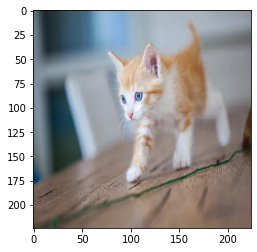

In [5]:
img, x = load_image('/content/drive/MyDrive/sample_images/img10.jpeg')
print('Shape of x ', x.shape)
# print('Shape of image ', img.shape)
plt.imshow(img)

In [6]:
predictions = model.predict(x)

for _, pred, prob in decode_predictions(predictions)[0]:
  print('Predicted %s with a probability of %0.3f'%(pred, prob))

Predicted tiger_cat with a probability of 0.141
Predicted Egyptian_cat with a probability of 0.134
Predicted tabby with a probability of 0.097
Predicted computer_keyboard with a probability of 0.027
Predicted mouse with a probability of 0.027


In [7]:
feat_extractor = Model(inputs = model.input, outputs = model.get_layer('fc2').output)
feat_extractor.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

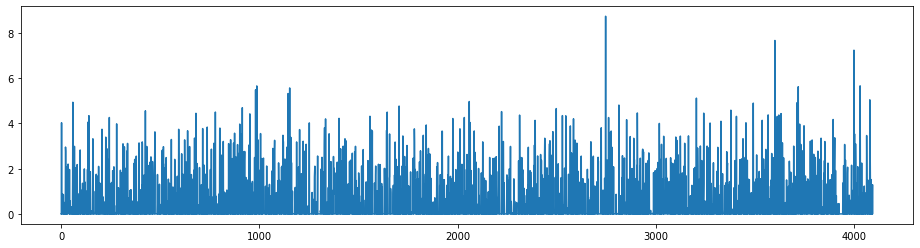

In [8]:
img, x = load_image('/content/drive/MyDrive/sample_images/img10.jpeg')
feat = feat_extractor.predict(x)
plt.figure(figsize = (16,4))
plt.plot(feat[0])

In [9]:
import random 

images_path = '/content/drive/MyDrive/sample_images'
image_extensions = ['.jpeg']   # case-insensitive (upper/lower doesn't matter)
max_num_images = 10000

images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(images_path) for f in filenames if os.path.splitext(f)[1].lower() in image_extensions]
if max_num_images < len(images):
    images = [images[i] for i in sorted(random.sample(xrange(len(images)), max_num_images))]

print("keeping %d images to analyze" % len(images))

keeping 12 images to analyze


In [10]:
images

['/content/drive/MyDrive/sample_images/img1.jpeg',
 '/content/drive/MyDrive/sample_images/img2.jpeg',
 '/content/drive/MyDrive/sample_images/img3.jpeg',
 '/content/drive/MyDrive/sample_images/img4.jpeg',
 '/content/drive/MyDrive/sample_images/img5.jpeg',
 '/content/drive/MyDrive/sample_images/img6.jpeg',
 '/content/drive/MyDrive/sample_images/img7.jpeg',
 '/content/drive/MyDrive/sample_images/img8.jpeg',
 '/content/drive/MyDrive/sample_images/img9.jpeg',
 '/content/drive/MyDrive/sample_images/img10.jpeg',
 '/content/drive/MyDrive/sample_images/img11.jpeg',
 '/content/drive/MyDrive/sample_images/img12.jpeg']

In [11]:
import time
tic = time.clock()


features = []
for i, image_path in enumerate(images):
    if i % 500 == 0:
        toc = time.clock()
        elap = toc-tic;
        print("analyzing image %d / %d. Time: %4.4f seconds." % (i, len(images),elap))
        tic = time.clock()
    img, x = load_image(image_path);
    feat = feat_extractor.predict(x)[0]
    features.append(feat)

print('finished extracting features for %d images' % len(images))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # This is added back by InteractiveShellApp.init_path()


analyzing image 0 / 12. Time: 0.0009 seconds.
finished extracting features for 12 images


In [12]:
from sklearn.decomposition import PCA

features = np.array(features)
pca = PCA(n_components=12)
pca.fit(features)

PCA(copy=True, iterated_power='auto', n_components=12, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [13]:
pca_features = pca.transform(features)


10
4096


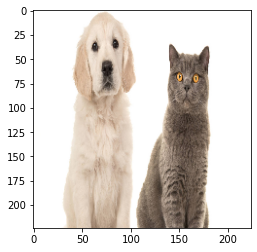

In [30]:
import random


query_image_idx = int(len(images) * random.random())
print(query_image_idx)
test_features = []
# img = image.load_img(images[query_image_idx])
# test_img = image.load_img('/content/drive/MyDrive/sample_images/test_image/img13.jpeg')

test_img, test_x = load_image('/content/drive/MyDrive/img16.jpeg')
test_feat = feat_extractor.predict(test_x)[0]
print(len(test_feat))
test_features.append(test_feat)
test_features = np.array(test_features)
pca2 = PCA(n_components=12)
pca2.fit(features)

test_pca_features = pca2.transform(test_features)
plt.imshow(test_img)

In [31]:
# img = image.load_img('/content/drive/MyDrive/sample_images/test_image/img13.jpeg')

In [32]:
from scipy.spatial import distance

similar_idx = [ distance.cosine(test_pca_features[0], feat) for feat in pca_features ]

In [33]:
idx_closest = sorted(range(len(similar_idx)), key=lambda k: similar_idx[k])[1:5]


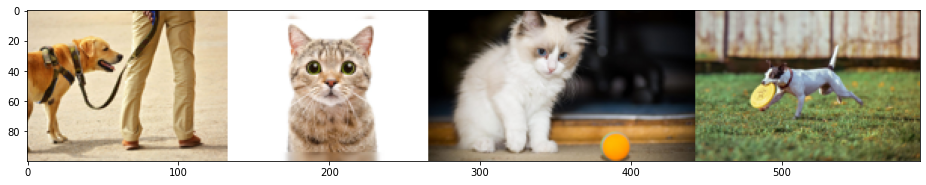

In [34]:
thumbs = []
for idx in idx_closest:
    img = image.load_img(images[idx])
    img = img.resize((int(img.width * 100 / img.height), 100))
    thumbs.append(img)

# concatenate the images into a single image
concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)

# show the image
plt.figure(figsize = (16,12))
plt.imshow(concat_image)